# 대선자료 시각화

In [55]:
# 모듈 불러오기
import pandas as pd

In [56]:
# Data 불러오기
election = pd.read_csv('../Data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [57]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [58]:
# 칼럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [59]:
# dimension 확인하기
election.shape

(248, 7)

In [60]:
# 칼럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [61]:
# 전체 칼럼에 대해 NaN 확인
election.isnull().sum()
election.isnull().any()
# NaN 없음

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [62]:
# election['election'] 
election['electionSum'] = election[['이재명','윤석열','심상정']].sum(axis='columns')

In [63]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [64]:
election['electionRatio'] = round((election['electionSum'] / election['투표수']) * 100,2)

In [65]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [66]:
# csv로 저장하기
election.to_csv('../Data/election_2022_1st.csv', index=False)

---
### 광역시별 투표율을 Pie Chart로 표현하기

In [67]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [76]:

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [69]:
plt.style.use('default')

## 선생님 방법

In [ ]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계
# election.pivot_table("투표수", index='광역시도', aggfunc=sum)

---

In [79]:
# 광역시도 열을 기준으로 그룹화, 합계 연산 

election_df = election.groupby('광역시도').sum()

# 내림차순으로 정렬
election_df.sort_values(by='투표수', ascending=False, inplace=True)

In [80]:
election_df['투표수'].sum(axis='rows')

33764664

In [81]:
election_df['광역시도별 투표율'] = round((election_df['투표수'] / election_df['투표수'].sum(axis='rows')) * 100,2)

In [82]:
election_df

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,광역시도별 투표율
광역시도,,,,,,,,
경기도,11106036,8518854,4297931,3859666,201113,8358710,4018.96,25.23
서울특별시,8346647,6501831,2944981,3255747,180324,6381052,2453.06,19.26
부산광역시,2921510,2200224,831896,1270072,47541,2149509,1562.69,6.52
경상남도,2809907,2146882,794130,1237346,52591,2084067,2132.21,6.36
인천광역시,2519225,1883504,913320,878560,51852,1843732,976.71,5.58
경상북도,2273028,1774284,418371,1278922,33123,1730416,2339.40,5.25
대구광역시,2046714,1611512,345045,1199888,31131,1576064,781.81,4.77
충청남도,1796474,1324660,589991,670283,31789,1292063,1560.70,3.92
전라남도,1581278,1282168,1094872,145549,16279,1256700,2152.66,3.80


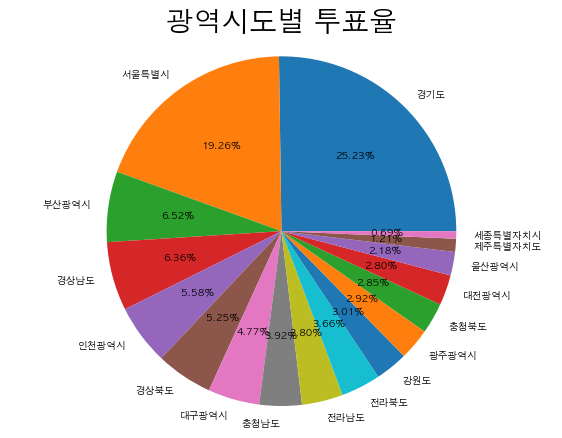

In [87]:
# 파이차트 그리기
election_df['광역시도별 투표율'].plot(
    kind='pie',
    figsize = (7, 5),
    autopct = '%.2f%%',
    textprops={'fontsize': 7}  # %를 나타내기 위해 하나의 이스케이프 문자 형태로 %%로 입력
)

plt.title("광역시도별 투표율", size = 20)
plt.axis('equal')
plt.ylabel('')
plt.show()

# 윤석열 후보의 광역시도별 투표율

In [95]:
윤 =  election.pivot_table("윤석열", index='광역시도', aggfunc=sum)
# 내림차순으로 정렬
윤.sort_values(by='윤석열', ascending=False, inplace=True)
윤

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


In [96]:
# 윤석열 투표율 구하기
윤['윤석열투표율'] = round((윤['윤석열'] / election_df['윤석열'].sum(axis='rows')) * 100,2)

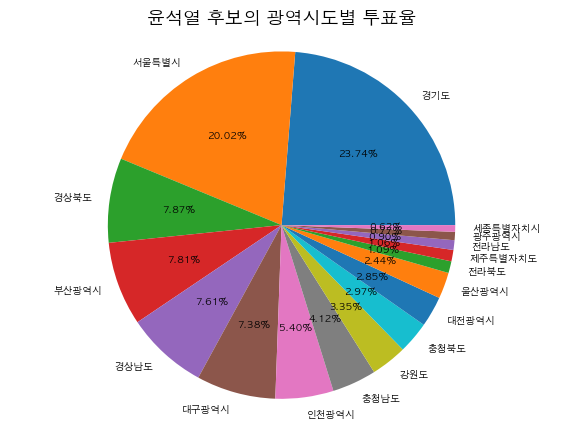

In [101]:
# 파이차트 그리기
윤['윤석열투표율'].plot(
    kind='pie',
    figsize = (7, 5),
    autopct = '%.2f%%',
    textprops={'fontsize': 7}  # %를 나타내기 위해 하나의 이스케이프 문자 형태로 %%로 입력
)

plt.title("윤석열 후보의 광역시도별 투표율", size = 13)
plt.axis('equal')
plt.ylabel('')
plt.show()

In [130]:
서울 = election[election['광역시도'] == '서울특별시']
윤_서울 =  서울.pivot_table("윤석열", index='시군구', aggfunc=sum)

# 내림차순으로 정렬
윤_서울.sort_values(by='윤석열', ascending=False, inplace=True)
윤_서울


,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593
관악구,151944
양천구,149780
은평구,140666


In [143]:
윤_서울[5:].sum()

윤석열       2240362.00
윤석열투표율         68.81
dtype: float64

In [146]:
윤_서울 = 윤_서울[:5].append(윤_서울[5:].sum(),ignore_index=True)

In [149]:
윤_서울.index = ['송파구','강남구','강서구','서초구','노원구','기타']

In [150]:
윤_서울

,윤석열,윤석열투표율
송파구,255166.0,7.84
강남구,235897.0,7.25
강서구,181510.0,5.58
서초구,179472.0,5.51
노원구,163340.0,5.02
기타,2240362.0,68.81


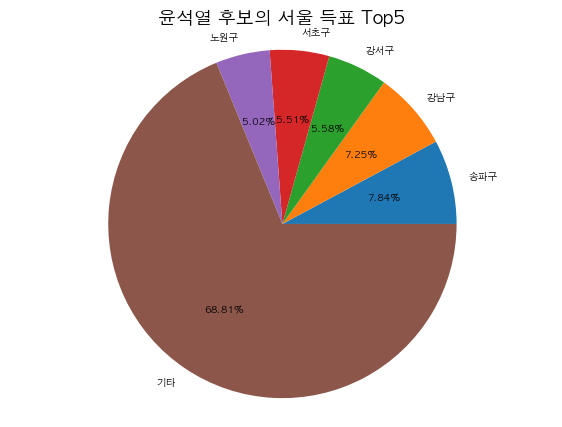

In [154]:
# 파이차트 그리기
윤_서울['윤석열'].plot(
    kind='pie',
    figsize = (7, 5),
    autopct = '%.2f%%',
    textprops={'fontsize': 7}  # %를 나타내기 위해 하나의 이스케이프 문자 형태로 %%로 입력
)

plt.title(f"{윤_서울.columns[0]} 후보의 서울 득표 Top5", size = 13)
plt.axis('equal')
plt.ylabel('')
plt.show()